Andrea Lizeth Lopez-Rodriguez

# Daily QC  Radionuclide Calibrator (Dose Calibrator) in NM

Data: January 2018 to December 2019. Inicialmente se importan los paquetes de Python que serán empleados en el análisis de los datos

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Paquete de tiempo
import datetime

%matplotlib inline

#Para cargar los datos

################################
######  MEDICINA NUCLEAR #######
################################

###Activimetro CRC 25 PET con fuente Cs-137
#data = pd.read_csv('ActPET.txt', delim_whitespace =True)

###Activimetro 55tR con fuente Co-57
data = pd.read_csv('ActSPECT.txt', delim_whitespace =True)

################################
######  RADIOFARMACIA #######
################################

###Activimetro RF CRC 15 R  con fuente Cs-137
#data = pd.read_csv('ActRF15R.txt', delim_whitespace =True)

###Activimetro RF CRC 55 tR  con fuente Cs-137
#data = pd.read_csv('ActRF55tR.txt', delim_whitespace =True)

###Activimetro RF Mec Murphill  con fuente Cs-137
#data = pd.read_csv('ActMecmur.txt', delim_whitespace =True)

###Activimetro RF CRC 25 PET  con fuente Cs-137
#data = pd.read_csv('ActRF25PET.txt', delim_whitespace =True)

###Activimetro RF Comecer Pitagoras 1 con fuente Cs-137
#data = pd.read_csv('ComecerPit1.txt', delim_whitespace =True)

###Activimetro RF Comecer Pitagoras 2 con fuente Cs-137
#data = pd.read_csv('ComecerPit2.txt', delim_whitespace =True)


#para ver los primeros datos
data.head()

,Number,Fecha,AjustemV,Fondo,Voltaje,Actividad,Desviacion
0,1,01/02/18,0.02,0.34,155.3,748.0,-2.1
1,2,01/03/18,0.02,0.30,155.3,747.0,-2.0
2,3,01/04/18,0.02,0.30,155.3,747.0,-1.7
3,4,01/05/18,0.02,0.36,155.3,746.0,-1.6
4,5,01/09/18,0.02,0.36,155.3,747.0,-1.7


In [52]:
data.describe()
#data.describe(include="all")
#data['Actividad'].describe()
#data.dtypes

,Number,AjustemV,Fondo,Voltaje,Actividad,Desviacion
count,439.00000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,220.00000,0.018314,2.355877,155.296583,352.553531,-1.885011
std,126.87264,0.029016,3.189927,0.031870,177.048141,0.639048
min,1.00000,0.010000,0.250000,155.000000,128.000000,-4.300000
25%,110.50000,0.010000,0.330000,155.300000,200.600000,-2.200000
50%,220.00000,0.010000,0.450000,155.300000,306.000000,-2.000000
75%,329.50000,0.020000,2.735000,155.300000,472.000000,-1.800000
max,439.00000,0.260000,11.860000,155.300000,748.000000,1.600000


In [53]:
##### de mCi a Bq
mcibq=3.7E7

##### de uCi a Bq
ucibq=3.7E4

## Fuentes Chequeo MN

In [54]:
### Fuentes de Chequeo en Medicina Nuclear 

##############################
########   Co 57  ###########

#Fecha de referencia
# primero de noviembre de 2015
Co='01/11/2015'
Co57= datetime.datetime.strptime(Co,'%d/%m/%Y')
#Actividad en mCi
AcCo= 5.774
#Actividad en Bq [1/s]
#AcCobq= AcCo*mcibq
### half life [días]
HLCo= 271.74
### half life [s]
HLCobq= 271.74*86400
### Lambda
Lambdaco= np.log(2)/HLCo
### Lambda [1/s]
Lambdacobq= np.log(2)/HLCobq

#############################################
######## Medicina Nuclear Cs 137  ###########

#Fecha de referencia
# primero de noviembre de 2015
Cs='01/11/2015'
Cs137= datetime.datetime.strptime(Cs,'%d/%m/%Y')
#Actividad en uCi
AcCs= 214.9
#Actividad en Bq [1/s]
#AcCsbq= AcCs*ucibq
### half life  [días]
HLCs= 30.08*365
### half life [s]
HLCsbq= HLCs*86400
### Lambda
Lambdacs= np.log(2)/HLCs
### Lambda [1/s]
Lambdacsbq= np.log(2)/HLCsbq



#############################################
######## Radiofarmacia Cs 137  ###########

#Fecha de referencia
# primero de Abril de 2007
Csrf='01/04/2007'
Cs137rf= datetime.datetime.strptime(Csrf,'%d/%m/%Y')
#Actividad en uCi
AcCsrf= 190.1
#Actividad en Bq [1/s]
#AcCsrfbq= AcCsrf*ucibq


### Lambda
Lambdacsrf= np.log(2)/HLCs

In [55]:
Lambdacobq
#len(data['Voltaje'])

2.9522840995202781e-08

In [1]:
##########   Co-57
#data['Incer']=(np.sqrt((data['Actividad']*mcibq)*Lambdacobq))/mcibq

##########   Cs-137
data['Incer']=(np.sqrt((data['Actividad']*ucibq)*Lambdacsbq))/ucibq

NameError: name 'np' is not defined

In [80]:
###### Cuentas
#(data['Actividad']*mcibq)/Lambdacobq

In [57]:
# import the visualization package: seaborn
import seaborn as sns

In [58]:
sns.set_context("talk",font_scale=1.4)

## HV Reading 

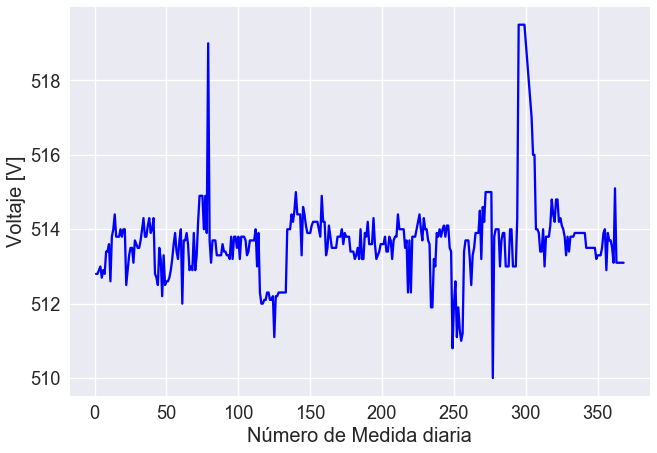

In [7]:
Medida=data['Number']
HV=data['Voltaje']
plt.ylabel('Voltaje [V]')
plt.xlabel('Número de Medida diaria')
#plt.title('Voltaje CRC 55tR MN')
plt.plot(Medida,HV,'b-')
### Voltaje nominal CRC 55tR- MN: 155.3 V. 5% desviacion 
#plt.text(330, 155.5, 'Voltaje nominal 155.3',size=14)
#plt.text(340, 148, 'Voltaje 5% 147.5',size=14)
#plt.text(340, 162, 'Voltaje 5% 163.1',size=14)
#plt.plot((0, 438),(147.5,147.5), 'k:', linewidth=2) 
#plt.plot((0, 438),(163.1,163.1), 'k:', linewidth=2)
#plt.savefig('rfPit2hv.pdf')
### Voltaje nominal CRC 55tR- RF: 156.0 V. 5% desviacion 
#plt.text(125, 156.3, 'Voltaje nominal 156.0',size=14)
#plt.text(125, 148.5, 'Voltaje 5% 148.2',size=14)
#plt.text(125, 163, 'Voltaje 5% 163.8',size=14)
#plt.plot((0, 185),(148.2,148.2), 'k:', linewidth=2) 
#plt.plot((0, 185),(163.8,163.8), 'k:', linewidth=2)
#plt.savefig('mncrc55tRhv.pdf')

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


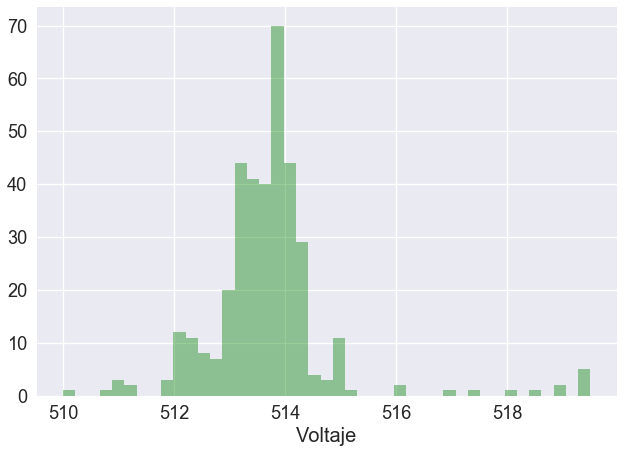

In [8]:
sns.distplot(data['Voltaje'],kde=False,color='g' )

### Número de datos mal diligenciados Radiofarmacia 

In [9]:
### CRC 15 R
#len(data[(data['Voltaje']>500)])
### CRC 25 PET
#len(data[(data['Voltaje']<500)])

In [10]:
### CRC 15 R 
#data.loc[(data['Voltaje']>500)]= np.nan
### CRC 25 PET
#data.loc[(data['Voltaje']<500)]= np.nan

In [11]:
#data['Voltaje'].describe()

#### Limpieza datos mal diligenciados RF 

In [12]:
#data.loc[(data['Voltaje']>500)]= np.nan

In [13]:
#data['Voltaje'].describe()

In [14]:
# simply drop whole row with NaN in "percent" column
#data.dropna(subset=["Voltaje"], axis=0, inplace=True)

# reset index, because we droped rows
#data.reset_index(drop=True, inplace=True)

In [15]:
#data['Voltaje'][3]

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frecuencia')

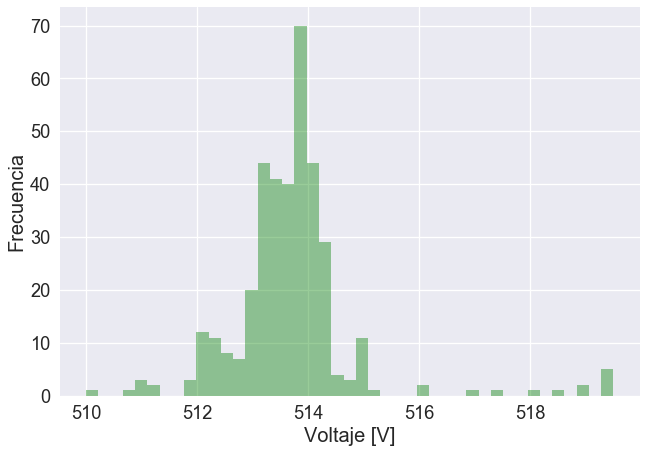

In [16]:
sns.distplot(data['Voltaje'],kde=False,color='g' )
## Añadir bins=1
#plt.title('Voltaje CRC 55tR MN')
plt.xlabel('Voltaje [V]')
plt.ylabel('Frecuencia')
#plt.savefig('mncrc55tRhhv.pdf')

In [17]:
#sns.boxplot(data['Voltaje'],orient="v")

In [18]:
len(data['Voltaje'].value_counts())
#data['Voltaje'].value_counts()

44

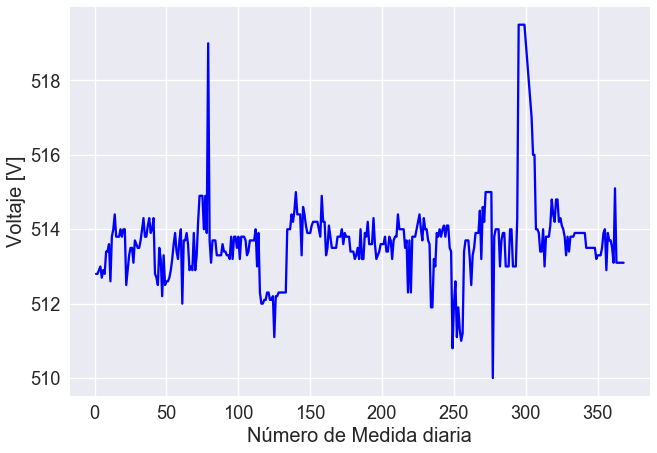

In [19]:
Medida=data['Number']
HV=data['Voltaje']
plt.ylabel('Voltaje [V]')
plt.xlabel('Número de Medida diaria')
#plt.title('Voltaje CRC 55tR MN')
plt.plot(Medida,HV,'b-')
### Voltaje nominal CRC 55tR- MN: 155.3 V. 5% desviacion 
#plt.text(330, 155.5, 'Voltaje nominal 155.3',size=14)
#plt.text(340, 148, 'Voltaje 5% 147.5',size=14)
#plt.text(340, 162, 'Voltaje 5% 163.1',size=14)
#plt.plot((0, 438),(147.5,147.5), 'k:', linewidth=2) 
#plt.plot((0, 438),(163.1,163.1), 'k:', linewidth=2)
#plt.savefig('rfPit2hv.pdf')
### Voltaje nominal CRC 55tR- RF: 156.0 V. 5% desviacion 
#plt.text(330, 156.3, 'Voltaje nominal 156.0',size=14)
#plt.text(340, 148, 'Voltaje 5% 148.2',size=14)
#plt.text(340, 162, 'Voltaje 5% 163.8',size=14)
#plt.plot((0, 185),(148.2,148.2), 'k:', linewidth=2) 
#plt.plot((0, 185),(163.8,163.8), 'k:', linewidth=2)
#plt.savefig('mncrc55tRchv.pdf')

In [20]:
#data['Voltaje'].mean()

In [21]:
#Z=data['Voltaje'].mean()*(0.05)


### Rango


In [22]:
#Z

In [23]:
#Zmin=data['Voltaje'].mean()-Z
#Zmax=data['Voltaje'].mean()+Z

In [24]:
#Zmin

In [25]:
#Zmax

## Amplifier offset 

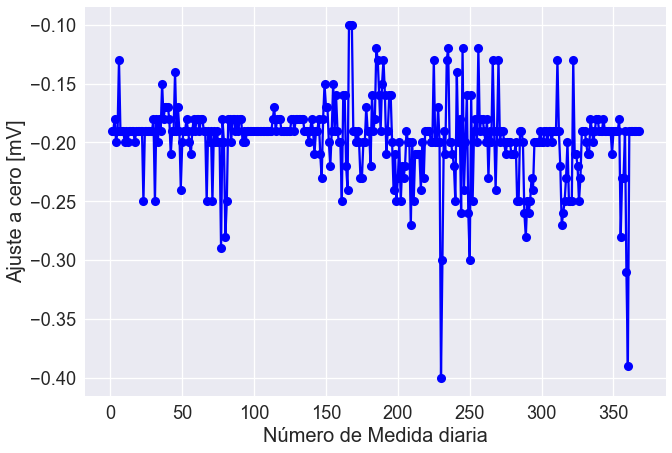

In [26]:
Medida=data['Number']
Ajuste=data['AjustemV']
plt.ylabel('Ajuste a cero [mV]')
plt.xlabel('Número de Medida diaria')
#plt.grid(False)
#plt.title('Ajuste a Cero CRC 55tR MN')
plt.plot(Medida,Ajuste,'ob-')
#plt.savefig('mncrc55tRcero.pdf')

In [27]:
#len(data['AjustemV'].value_counts())
data['AjustemV'].value_counts()

-0.19    138
-0.20     59
-0.18     46
-0.21     21
-0.25     20
-0.23     12
-0.16     10
-0.17      9
-0.13      9
-0.22      8
-0.24      7
-0.26      5
-0.12      4
-0.15      4
-0.10      3
-0.28      3
-0.27      2
-0.14      2
-0.30      2
-0.29      1
-0.31      1
-0.39      1
-0.40      1
Name: AjustemV, dtype: int64

In [28]:
data['AjustemV'].describe()

count    368.000000
mean      -0.197120
std        0.033454
min       -0.400000
25%       -0.200000
50%       -0.190000
75%       -0.190000
max       -0.100000
Name: AjustemV, dtype: float64

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frecuencia')

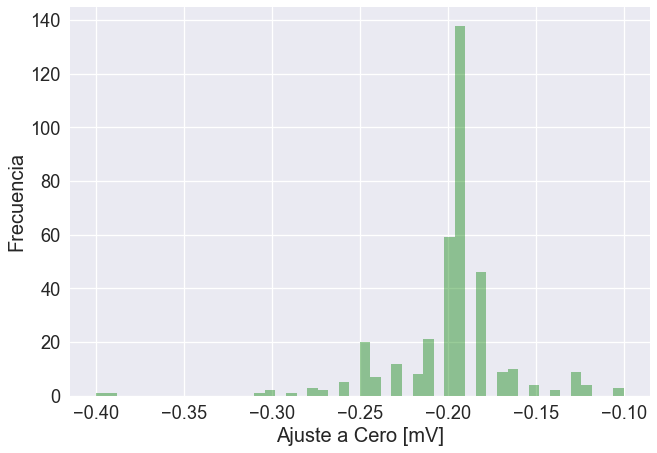

In [29]:
sns.distplot(data['AjustemV'],kde=False,color='g' )
## Añadir bins=1
#plt.title('Ajuste a Cero CRC 55tR MN')
plt.xlabel('Ajuste a Cero [mV]')
plt.ylabel('Frecuencia')
#plt.savefig('mncrc55tRhcero.pdf')

In [30]:
#sns.boxplot(data['AjustemV'],orient="v")

### Cambio Ajuste mV -last measurement
#### Calcular Diferencias

In [31]:
###############################################
###### CRC 15 R, CRC 55 tR, CRC 25 PET ########
###############################################

###### Diferencia entre datos
diffajuste = data.AjustemV.diff()


#diffajuste


###### Porcentaje de Diferencia 
#data.AjustemV.pct_change()*100

In [32]:
diffajuste.replace(np.nan, 0.0, inplace=True)

In [33]:
data['Diffzero']=diffajuste

In [34]:
len(data['Diffzero'].value_counts())
#data['Diffzero'].value_counts()

41

In [35]:
data['Diffzero'].describe()

count    368.000000
mean       0.000000
std        0.039077
min       -0.200000
25%       -0.010000
50%        0.000000
75%        0.010000
max        0.200000
Name: Diffzero, dtype: float64

In [36]:
#data['Diffzero']

In [37]:
data['Diffzero'].describe()

count    368.000000
mean       0.000000
std        0.039077
min       -0.200000
25%       -0.010000
50%        0.000000
75%        0.010000
max        0.200000
Name: Diffzero, dtype: float64

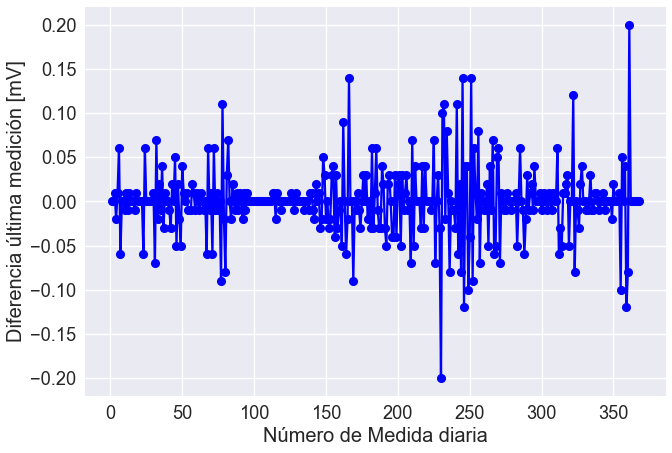

In [38]:
Diffzero=data['Diffzero']
plt.ylabel('Diferencia última medición [mV]')
plt.xlabel('Número de Medida diaria')
#plt.grid(False)
#plt.title('Diferencia ajuste a cero CRC 55tR MN')
#plt.plot((0, 252),(0.3,0.3), 'k:', linewidth=2) 
#plt.plot((0, 252),(-0.3,-0.3), 'k:', linewidth=2) 
plt.plot(Medida,Diffzero,'ob-')
#plt.savefig('mncrc55tR_diff.pdf')

#### Condición para cumplir respecto a la última medición

In [39]:
#len(data[(np.absolute(data['Diffzero'])>0.3)])
ajuste_fuera=np.absolute(data['Diffzero'])>0.3

In [40]:
#cosa= data[ajuste_fuera].index

In [41]:
lst=[ ]
i=0
for x in range(len(data['Diffzero'])):
    if ajuste_fuera[x]:
        i+=1
        lst.append(x)
print(i)

0


In [42]:
lst

[]

In [43]:
#sns.boxplot(data['Diffzero'],orient="v")

In [44]:
#sns.distplot(data['Diffzero'],kde=False,color='g' )

In [45]:
#sns.distplot(data['Diffzero'],kde=False,color='g')
## Añadir bins=1
#plt.title('Diferencia Ajuste CRC 15R')
#plt.xlabel('Diferencia última medición [mV]')
#plt.ylabel('Frecuencia')
#plt.savefig('rfcrc15Rhdiff.pdf')

In [46]:


#def cero(datos): 
    #lst=[ ]
    #i=0
    #for x in datos: 
        #if np.absolute(x)>0.3)
#lst=[]
#for i in range(len(data['Diffzero'])): 
    #if ((np.absolute(data['Diffzero'][i])>0.3) & (np.absolute(data['Diffzero'][i+1])>0.3)):
        #lst.append(i)

## Background

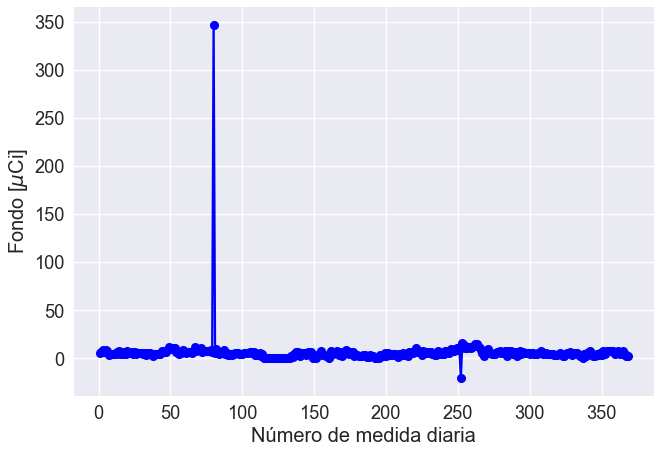

In [47]:
Medida=data['Number']
background=data['Fondo']
plt.ylabel('Fondo [$\mu$Ci]')
plt.xlabel('Número de medida diaria')
#plt.title('Fondo CRC 55tR MN')
#plt.grid(False)
plt.plot(Medida,background,'ob-')
#plt.savefig('mncrc55tRfondo.pdf')

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frecuencia')

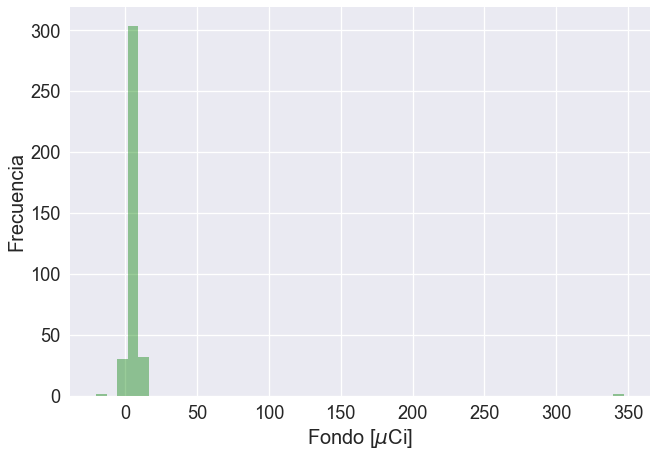

In [48]:
sns.distplot(data['Fondo'],kde=False,color='g')
## Añadir bins=1
#plt.title('Fondo CRC 55tR MN')
plt.xlabel('Fondo [$\mu$Ci]')
plt.ylabel('Frecuencia')
#plt.savefig('mncrc55tRhfondo.pdf')

In [49]:
#sns.boxplot(data['Fondo'],orient="v")

#### Condición fondo menor a 15 uCi

In [50]:
len(data[(data['Fondo'])>15])

4

In [51]:
len(data['Fondo'].value_counts())
#data['Fondo'].value_counts()
#len(data[(data['Fondo'])<0])

220

In [52]:
data['Fondo'].describe()

count    368.000000
mean       6.261033
std       18.064371
min      -20.400000
25%        3.875000
50%        5.300000
75%        6.685000
max      347.000000
Name: Fondo, dtype: float64

## Check Source Accuracy,  % desviación

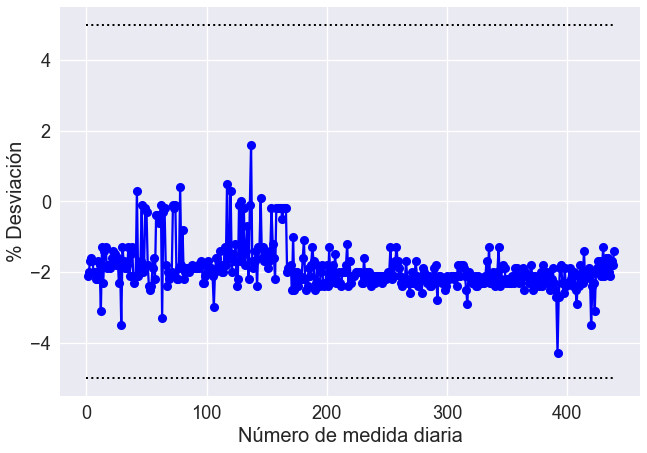

In [76]:
Medida=data['Number']
Error=data['Desviacion']
plt.ylabel('% Desviación')
plt.xlabel('Número de medida diaria')
#plt.title('Desviación % Co-57 CRC 55tR MN')
plt.plot(Medida,Error,'bo-')
plt.plot((0, 439),(5,5), 'k:', linewidth=2) 
plt.plot((0, 439),(-5,-5), 'k:', linewidth=2) 
#plt.savefig('mncrc55tRdesv.pdf')

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frecuencia')

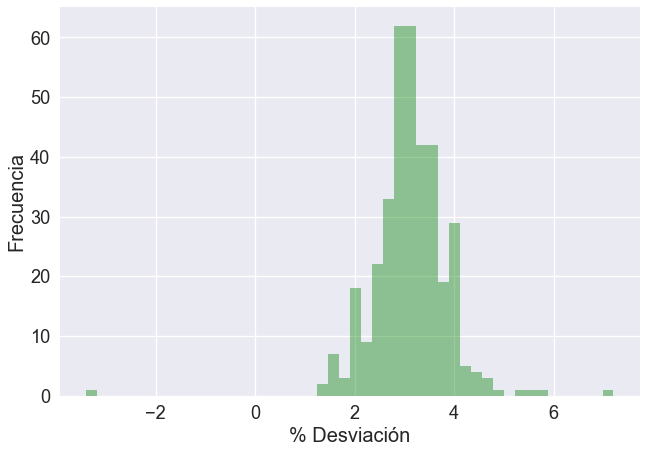

In [54]:
sns.distplot(data['Desviacion'],kde=False,color='g' )
#plt.title('Desviación % Co-57 CRC 55tR MN')
plt.xlabel('% Desviación')
plt.ylabel('Frecuencia')
#plt.savefig('mncrc55tRhdesv.pdf')

In [55]:
#sns.boxplot(data['Desviacion'],orient="v")
#sns.swarmplot(data['Desviacion'],orient="v", color=".25")

In [56]:
len(data[(np.absolute(data['Desviacion'])>5.0)])

4

In [57]:
len(data['Desviacion'].value_counts())
#data['Desviacion'].value_counts()

39

In [58]:
data['Desviacion'].describe()

count    368.000000
mean       3.116304
std        0.774249
min       -3.400000
25%        2.700000
50%        3.200000
75%        3.500000
max        7.200000
Name: Desviacion, dtype: float64

## Activimetro Inyección

### Practical Mathematics in Nuclear Medicine Technology, Patricia Wells

#### How to calculate the acceptable range of dose calibrator readings for a given source, Pag 102 

In [59]:
################# Elapsed time ###############

#data["Fecha"][0]

d = pd.to_datetime(data["Fecha"],format='%m/%d/%y')
###Cobalto 57
timeE=(d-Co57)

### Cesio 137
#timeE=(d-Cs137)
#timeE=(d-Cs137rf)


#test='01/02/18'
#date=datetime.datetime.strptime(test,'%m/%d/%y')
#c=(date-dateCo57).days

In [60]:
data['timeE']=timeE.dt.days.values

In [61]:
#data

In [62]:
############# Expected Activity ###########
#### Act =Act_oe^{-\lambda t}

###Cobalto 57
Actco=AcCo*np.exp(-Lambdaco*data["timeE"])*1000

###Cesio 137
#Actcs=AcCs*np.exp(-Lambdacs*data["timeE"])

In [63]:
#Actco

In [64]:
data['EAct']=round(Actco,1)

In [65]:
#data

In [66]:
############# Acceptable Range of dose calibrator readings ###########

### 10% ó 5%
X=data['EAct']*(0.05)


### Rango
Rmin=data['EAct']-X
Rmax=data['EAct']+X

In [67]:
### Ingresar datos en el data 
data['Rmin']=Rmin
data['Rmax']=Rmax

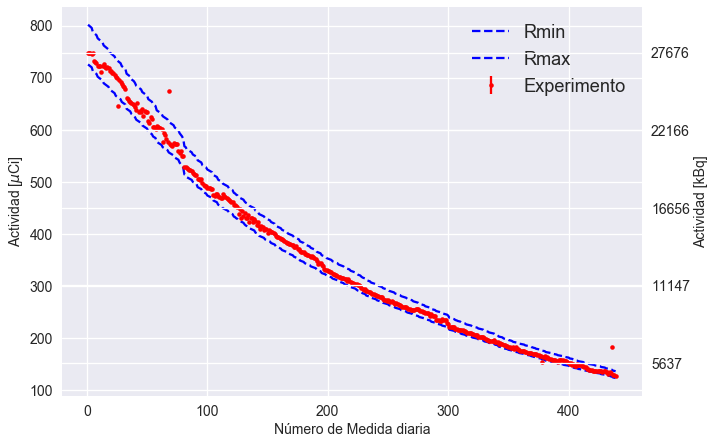

In [68]:
### Plot the data
ax1=plt.subplot(1,1,1)

ax1.errorbar(data['Number'],data['Actividad'],yerr=data['Incer'],fmt='.r',label='Experimento',capsize=6)
ax1.plot(data['Number'],data['Rmin'],'b--')
ax1.plot(data['Number'],data['Rmax'],'b--')


#ax1.set_title('Actividad Co-57 CRC 55tR MN',fontsize=14)
ax1.set_xlabel('Número de Medida diaria',fontsize=14)
ax1.set_ylabel('Actividad [$\mu$Ci]',fontsize=14)
ax1.tick_params(axis='both',labelsize=14)
ax1.legend()
#ax1.set_yscale('log')
## Set second y-axis for MBq
ax2 = ax1.twinx()
kBqs = np.linspace(data['Actividad'].min(),data['Actividad'].max()*37,6) # Actividad en MBq
ax2.set_yticks(kBqs/37) # Ponga los ticks
ax2.set_yticklabels(kBqs.astype(int)) # Ponga los Labels
ax2.yaxis.set_ticks_position('right') # set the position of the second x-axis to bottom
ax2.yaxis.set_label_position('right') # set the position of the second x-axis to bottom
ax2.spines['right'].set_position(('outward', 0))
ax2.set_ylabel('Actividad [kBq]',fontsize=14)
ax2.set_ylim(ax1.get_ylim())
ax2.tick_params(axis='y',labelsize=14)


#plt.savefig('mncrc55tRcs.pdf')

#plt.legend()
#plt.title('TODOS')
#plt.ylabel('Actividad [$\mu$Ci]')
#plt.xlabel('Measurement number')

In [69]:
#plt.errorbar(data['Number'],data['Actividad'], yerr=data['Incer'],fmt='.r',label='Experimento',capsize=1)
#plt.plot(data['Tiempo'],N,label='ajuste')
#plt.xlabel(r'Tiempo [s]',size=15)
#plt.ylabel(r'N (cuentas)',size=20)

#tx=r'$\mathbf{{\tau}}$ = {:.1f} $\pm$ {:.1f}'
#plt.annotate(tx.format(tau,inctau),xy=(20, 20), fontsize=12, fontweight="bold")
#plt.legend()
#plt.ylim(1E-20,1E2)
#plt.yscale('log')
#plt.savefig('eficazcm.pdf')

#### Percent error for dose calibrator accuracy and constancy, Pag 104

In [69]:
##Diferencia
#perce=np.absolute(((data['EAct']-data['Actividad'])*100)/data['EAct'])
perce=(-(data['EAct']-data['Actividad'])*100)/data['EAct']

In [2]:
percent=round(perce,1)
#percent

NameError: name 'perce' is not defined

In [71]:
### Ingresar datos en el data 
data['percent']=percent

In [72]:
#data[24:50]

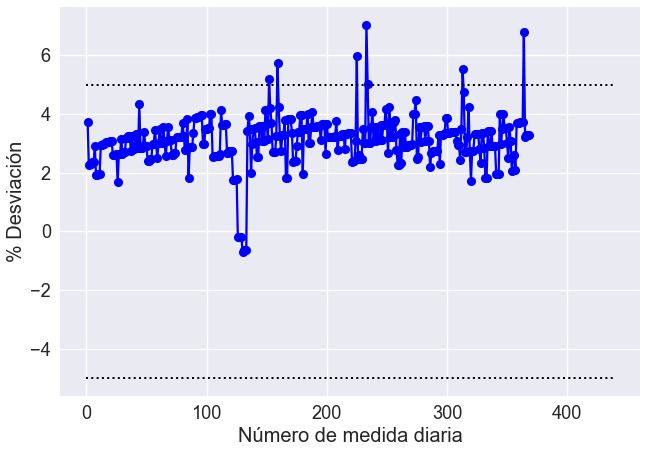

In [73]:
plt.ylabel('% Desviación')
plt.xlabel('Número de medida diaria')
#plt.title('Co-57 check source accuracy')
plt.plot(Medida,data['percent'],'bo-')
plt.plot((0, 439),(5,5), 'k:', linewidth=2) 
plt.plot((0, 439),(-5,-5), 'k:', linewidth=2) 
#plt.savefig('mncrc55tRdesm.pdf')

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frecuencia')

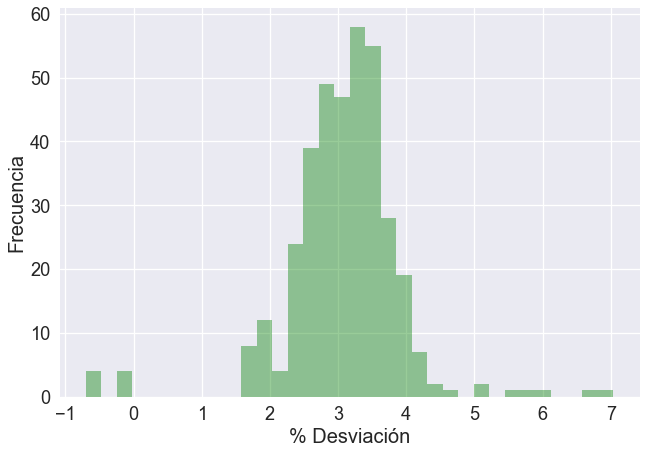

In [74]:
sns.distplot(data['percent'],kde=False,color='g')
#plt.title('Desviación % Co-57 CRC 55tR MN')
plt.xlabel('% Desviación')
plt.ylabel('Frecuencia')
#plt.savefig('mncrc55tRhdesm.pdf')

In [75]:
#sns.boxplot(data['percent'],orient="v")
#sns.swarmplot(data['percent'],orient="v", color=".25")

In [76]:
len(data[(np.absolute(data['percent'])>5.0)])

7

In [77]:
len(data['percent'].value_counts())
#data['percent'].value_counts()

146

In [78]:
data['percent'].describe()

count    368.000000
mean       3.072527
std        0.859091
min       -0.700000
25%        2.690000
50%        3.105000
75%        3.522500
max        7.040000
Name: percent, dtype: float64

In [79]:
#sns.residplot(data['EAct'], data['Actividad'])
#plt.ylabel('Difference')
#plt.xlabel('Theoretical Activity')

In [80]:
#residuos=data['Actividad']-data['EAct']
#data['residuos']= residuos

In [81]:
#data['residuos'].describe()

## Razones de Actividades 

\begin{equation}
\frac{\text{Actividad Medida}}{\text{Actividad Esperada}}
\end{equation}

In [70]:
razon=data['Actividad']/data['EAct']
razoninc=data['Incer']/data['EAct']

In [71]:
data['razon']=round(razon,3)

In [72]:
data['razon'].head(10)

0    0.979
1    0.980
2    0.983
3    0.984
4    0.996
5    0.979
6    0.979
7    0.979
8    0.978
9    0.980
Name: razon, dtype: float64

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frecuencia')

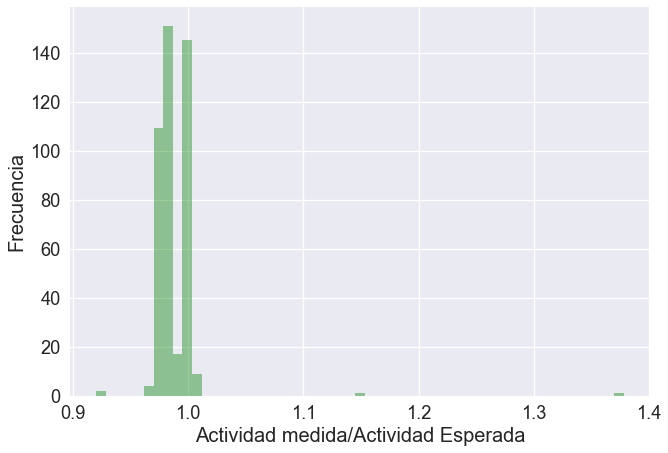

In [73]:
sns.distplot(data['razon'],bins=55,kde=False,color='g')
#plt.title('Razón Actividad Co-57 CRC 55tR MN')
plt.xlabel('Actividad medida/Actividad Esperada')
plt.ylabel('Frecuencia')
#plt.savefig('mncrc55tRhrazon.pdf')

In [74]:
#sns.boxplot(data['razon'],orient="v")
#sns.swarmplot(data['razon'],orient="v", color=".25")

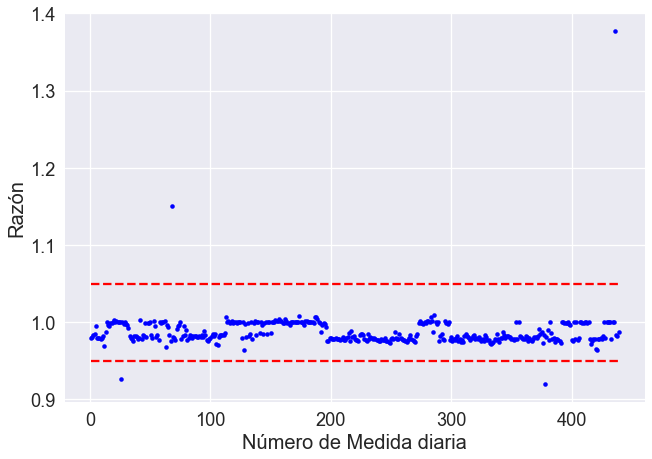

In [78]:
y1= 0.95 + (Medida*0)
y2= 1.05 + (Medida*0)
#plt.grid(False)
plt.ylabel('Razón')
plt.xlabel('Número de Medida diaria')
#plt.title('Razón actividad Co-57 CRC 55tR MN')
plt.errorbar(Medida,razon, yerr=razoninc,fmt='.b',label='Experimento',capsize=6)
#plt.plot(Medida,razon,'bo')
plt.plot(Medida,y1,'r--')
plt.plot(Medida,y2,'r--')
#plt.savefig('mncrc55tRraz.pdf')

In [88]:
def countdata(datos,I):
    i=0
    l=0
    m=0
    for x in datos:
    #Condition check
        if x==I:
            i+=1
        if x<I:
            l+=1
        if x>I: 
            m+=1
    return i,l,m

In [89]:
countdata(data['razon'],1.00)

(0, 8, 360)

In [90]:
#data['razon'].mean()

In [91]:
#data['razon'].std() *2

In [92]:
data['razon'].describe()

count    368.000000
mean       1.030747
std        0.008572
min        0.993000
25%        1.027000
50%        1.031000
75%        1.035000
max        1.070000
Name: razon, dtype: float64

In [93]:
len(data[(data['razon'])>1.05])

6

In [94]:
len(data[(data['razon'])<0.95])

0

In [95]:
len(data['razon'].value_counts())
#data['razon'].value_counts()

39

# Limpieza Datos 

## Voltaje 15R, 25PET

In [96]:
Z=data['Voltaje'].mean()*(0.05)
Zmin=data['Voltaje'].mean()-Z
Zmax=data['Voltaje'].mean()+Z

In [97]:
Zmin

488.01732336956496

In [98]:
Zmax

539.3875679347823

### Desviación medida > 5%

In [99]:
len(data[(np.absolute(data['Desviacion'])>5.0)])

4

### Desviación calculada >5%

In [100]:
len(data[(np.absolute(data['percent'])>5.0)])

7

## Numero de datos fuera

### CAPINTEC

In [101]:
########################
### MEDICINA NUCLEAR ###
########################

###   CAPINTEC 55 tR MN
#len(data[(data['Fondo']<0.0) | (data['Fondo']>15.0)])+ len(data[(data['razon']<0.95) | (data['razon']>1.05)])+len(data[(np.absolute(data['Diffzero'])>0.3)])+ len(data[(data['Voltaje']<147.5) | (data['Voltaje']>163.1)])
###   CAPINTEC 25 PET MN 
len(data[(data['Fondo']<0.0) | (data['Fondo']>15.0)])+ len(data[(data['razon']<0.95) | (data['razon']>1.05)])+len(data[(np.absolute(data['Diffzero'])>0.3)])+len(data[(data['Voltaje']<Zmin) | (data['Voltaje']>Zmax)])

######################
### RADIOFARMACIA ###
#####################

### CAPINTEC 15 R   RF
#len(data[(data['Fondo']<0.0) | (data['Fondo']>15.0)])+ len(data[(data['razon']<0.95) | (data['razon']>1.05)])+len(data[(np.absolute(data['Diffzero'])>0.3)])+len(data[(data['Voltaje']>500)])+len(data[(data['Voltaje']<Zmin) | (data['Voltaje']>Zmax)])
###   CAPINTEC 55 tR RF
#len(data[(data['Fondo']<0.0) | (data['Fondo']>15.0)])+ len(data[(data['razon']<0.95) | (data['razon']>1.05)])+len(data[(np.absolute(data['Diffzero'])>0.3)])+len(data[(data['Voltaje']<148.2) | (data['Voltaje']>163.8)])
###   CAPINTEC 25 PET RF
#len(data[(data['Fondo']<0.0) | (data['Fondo']>15.0)])+ len(data[(data['razon']<0.95) | (data['razon']>1.05)])+len(data[(np.absolute(data['Diffzero'])>0.3)])+len(data[(data['Voltaje']<500)])+len(data[(data['Voltaje']<Zmin) | (data['Voltaje']>Zmax)])

11

In [102]:
#data['Diffzero']

### Ajuste a cero

In [103]:
## Cuantos datos por fuera del rango según fabricante
len(data[(np.absolute(data['Diffzero'])>0.3)])

0

In [104]:
#Localización y conversión a Not a Number NaN
data.loc[np.absolute(data['Diffzero'])>0.3]= np.nan

In [105]:
# simply drop whole row with NaN in "Fondo" column
data.dropna(subset=["Diffzero"], axis=0, inplace=True)

In [106]:
data.describe()

,Number,AjustemV,Fondo,Voltaje,Actividad,Desviacion,Diffzero,timeE,EAct,Rmin,Rmax,percent,razon
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,184.500000,-0.197120,6.261033,513.702446,206.149457,3.116304,0.000000,1138.622283,200.008152,190.007745,210.008560,3.072527,1.030747
std,106.376689,0.033454,18.064371,1.169210,2.818226,0.774249,0.039077,196.094681,2.475127,2.351371,2.598884,0.859091,0.008572
min,1.000000,-0.400000,-20.400000,510.000000,200.000000,-3.400000,-0.200000,794.000000,195.600000,185.820000,205.380000,-0.700000,0.993000
25%,92.750000,-0.200000,3.875000,513.200000,204.000000,2.700000,-0.010000,973.500000,198.000000,188.100000,207.900000,2.690000,1.027000
50%,184.500000,-0.190000,5.300000,513.700000,206.000000,3.200000,0.000000,1138.500000,200.000000,190.000000,210.000000,3.105000,1.031000
75%,276.250000,-0.190000,6.685000,514.000000,209.000000,3.500000,0.010000,1296.250000,202.100000,191.995000,212.205000,3.522500,1.035000
max,368.000000,-0.100000,347.000000,519.500000,213.000000,7.200000,0.200000,1489.000000,204.400000,194.180000,214.620000,7.040000,1.070000


In [107]:
#data

### Fondo 

In [108]:
## Cuantos datos por fuera del protocolo INC 
len(data[(data['Fondo']<0.0) | (data['Fondo']>15.0)])

5

In [109]:
#Localización y conversión a Not a Number NaN
data.loc[(data['Fondo']<0.0) | (data['Fondo']>15.0)]= np.nan

In [110]:
# simply drop whole row with NaN in "Fondo" column
data.dropna(subset=["Fondo"], axis=0, inplace=True)

In [111]:
data.describe()

,Number,AjustemV,Fondo,Voltaje,Actividad,Desviacion,Diffzero,timeE,EAct,Rmin,Rmax,percent,razon
count,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000
mean,183.983471,-0.196722,5.318099,513.719008,206.151515,3.116529,0.000386,1137.837466,200.018182,190.017273,210.019091,3.068430,1.030708
std,106.689744,0.033224,2.551982,1.163414,2.823905,0.776593,0.038599,196.771086,2.483437,2.359265,2.607609,0.861127,0.008593
min,1.000000,-0.400000,0.000000,510.000000,200.000000,-3.400000,-0.200000,794.000000,195.600000,185.820000,205.380000,-0.700000,0.993000
25%,92.500000,-0.200000,3.850000,513.300000,204.000000,2.700000,-0.010000,972.000000,198.000000,188.100000,207.900000,2.690000,1.027000
50%,183.000000,-0.190000,5.300000,513.700000,206.000000,3.200000,0.000000,1137.000000,200.000000,190.000000,210.000000,3.090000,1.031000
75%,277.500000,-0.190000,6.660000,514.000000,209.000000,3.500000,0.010000,1297.500000,202.100000,191.995000,212.205000,3.520000,1.035000
max,368.000000,-0.100000,14.230000,519.500000,213.000000,7.200000,0.200000,1489.000000,204.400000,194.180000,214.620000,7.040000,1.070000


### Razón

In [112]:
## Cuantos datos por fuera del rango según servicio
len(data[(data['razon']<0.95) | (data['razon']>1.05)])

6

In [113]:
#Localización y conversión a Not a Number NaN
data.loc[(data['razon']<0.95) | (data['razon']>1.05)]= np.nan

In [114]:
# simply drop whole row with NaN in "razon" column
data.dropna(subset=["razon"], axis=0, inplace=True)

In [115]:
data.describe()

,Number,AjustemV,Fondo,Voltaje,Actividad,Desviacion,Diffzero,timeE,EAct,Rmin,Rmax,percent,razon
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,183.025210,-0.196807,5.346190,513.719048,206.075630,3.098599,0.000448,1136.070028,200.040896,190.038852,210.042941,3.018403,1.030210
std,106.863175,0.033283,2.561457,1.171250,2.776829,0.750411,0.038662,197.074996,2.487510,2.363134,2.611885,0.771168,0.007701
min,1.000000,-0.400000,0.000000,510.000000,200.000000,-3.400000,-0.200000,794.000000,195.600000,185.820000,205.380000,-0.700000,0.993000
25%,91.000000,-0.200000,3.950000,513.300000,204.000000,2.700000,-0.010000,968.000000,198.000000,188.100000,207.900000,2.690000,1.027000
50%,182.000000,-0.190000,5.300000,513.700000,206.000000,3.200000,0.000000,1136.000000,200.000000,190.000000,210.000000,3.090000,1.031000
75%,277.000000,-0.190000,6.670000,514.000000,209.000000,3.500000,0.010000,1297.000000,202.200000,192.090000,212.310000,3.500000,1.035000
max,368.000000,-0.100000,14.230000,519.500000,212.000000,7.200000,0.200000,1489.000000,204.400000,194.180000,214.620000,5.030000,1.050000


## Capintec 55 tR MN

### Voltaje

In [116]:
## Cuantos datos por fuera del rango según fabricante
#len(data[(data['Voltaje']<147.5) | (data['Voltaje']>163.1)])

In [117]:
#Localización y conversión a Not a Number NaN
#data.loc[(data['Voltaje']<147.5) | (data['Voltaje']>163.1)]= np.nan

In [118]:
# simply drop whole row with NaN in "Voltaje" column
#data.dropna(subset=["Voltaje"], axis=0, inplace=True)

In [119]:
#data.describe()

## Capintec 55 tR RF

### Voltaje

In [120]:
## Cuantos datos por fuera del rango según fabricante
#len(data[(data['Voltaje']<148.2) | (data['Voltaje']>163.8)])

In [121]:
#Localización y conversión a Not a Number NaN
#data.loc[(data['Voltaje']<148.2) | (data['Voltaje']>163.8)]= np.nan

In [122]:
# simply drop whole row with NaN in "Voltaje" column
#data.dropna(subset=["Voltaje"], axis=0, inplace=True)

In [123]:
#data.loc[np.absolute(data['percent'])>5.0]= np.nan

In [124]:
#test
#data[376:436]

In [125]:
# simply drop whole row with NaN in "percent" column
#data.dropna(subset=["percent"], axis=0, inplace=True)

# reset index, because we droped rows
#data.reset_index(drop=True, inplace=True)

In [126]:
#data.describe()

## Capintec 15 R RF

### Voltaje

In [127]:
#len(data[(data['Voltaje']<Zmin) | (data['Voltaje']>Zmax)])

In [128]:
#Localización y conversión a Not a Number NaN
#data.loc[(data['Voltaje']<Zmin) | (data['Voltaje']>Zmax)]= np.nan

In [129]:
# simply drop whole row with NaN in "Voltaje" column
#data.dropna(subset=["Voltaje"], axis=0, inplace=True)

## Capintec 25 PET RF

### Voltaje

In [130]:
len(data[(data['Voltaje']<Zmin) | (data['Voltaje']>Zmax)])

0

In [131]:
#Localización y conversión a Not a Number NaN
data.loc[(data['Voltaje']<Zmin) | (data['Voltaje']>Zmax)]= np.nan

In [132]:
# simply drop whole row with NaN in "Voltaje" column
data.dropna(subset=["Voltaje"], axis=0, inplace=True)

In [133]:
#reset index, because we droped rows
data.reset_index(drop=True, inplace=True)

In [134]:
data.describe()

,Number,AjustemV,Fondo,Voltaje,Actividad,Desviacion,Diffzero,timeE,EAct,Rmin,Rmax,percent,razon
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,183.025210,-0.196807,5.346190,513.719048,206.075630,3.098599,0.000448,1136.070028,200.040896,190.038852,210.042941,3.018403,1.030210
std,106.863175,0.033283,2.561457,1.171250,2.776829,0.750411,0.038662,197.074996,2.487510,2.363134,2.611885,0.771168,0.007701
min,1.000000,-0.400000,0.000000,510.000000,200.000000,-3.400000,-0.200000,794.000000,195.600000,185.820000,205.380000,-0.700000,0.993000
25%,91.000000,-0.200000,3.950000,513.300000,204.000000,2.700000,-0.010000,968.000000,198.000000,188.100000,207.900000,2.690000,1.027000
50%,182.000000,-0.190000,5.300000,513.700000,206.000000,3.200000,0.000000,1136.000000,200.000000,190.000000,210.000000,3.090000,1.031000
75%,277.000000,-0.190000,6.670000,514.000000,209.000000,3.500000,0.010000,1297.000000,202.200000,192.090000,212.310000,3.500000,1.035000
max,368.000000,-0.100000,14.230000,519.500000,212.000000,7.200000,0.200000,1489.000000,204.400000,194.180000,214.620000,5.030000,1.050000


In [135]:
len(data[(np.absolute(data['Desviacion'])>5.0)])

2

In [136]:
len(data[(np.absolute(data['percent'])>5.0)])

1

In [155]:
data.loc[np.absolute(data['percent'])>5.0]= np.nan

In [156]:
data.dropna(subset=["percent"], axis=0, inplace=True)

In [157]:
#reset index, because we droped rows
data.reset_index(drop=True, inplace=True)

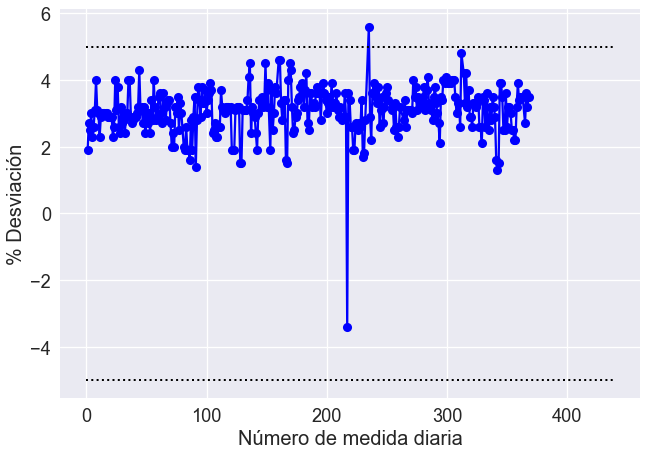

In [158]:
Medida=data['Number']
Error=data['Desviacion']
plt.ylabel('% Desviación')
plt.xlabel('Número de medida diaria')
#plt.title('Desviación % Co-57 CRC 55tR MN')
plt.plot(Medida,Error,'bo-')
plt.plot((0, 439),(5,5), 'k:', linewidth=2) 
plt.plot((0, 439),(-5,-5), 'k:', linewidth=2) 
#plt.savefig('mncrc55tRdesv.pdf')

In [159]:
data[data['Desviacion']>5.0]

,Number,Fecha,AjustemV,Fondo,Voltaje,Actividad,Desviacion,Diffzero,timeE,EAct,Rmin,Rmax,percent,razon
228,235.0,03/05/19,-0.12,3.5,511.9,205.0,5.6,0.01,1220.0,199.0,189.05,208.95,3.02,1.03


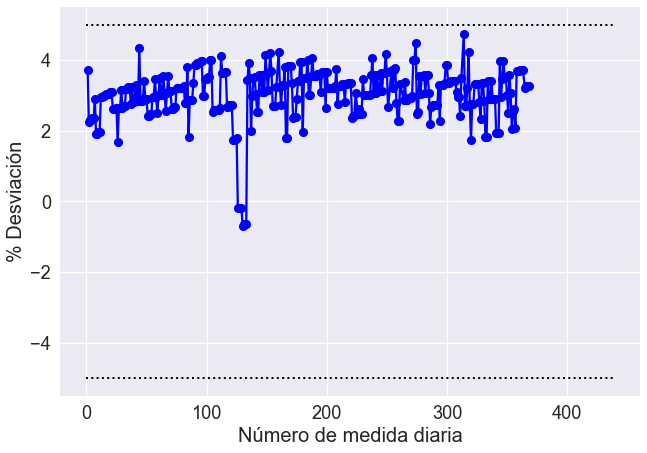

In [160]:
plt.ylabel('% Desviación')
plt.xlabel('Número de medida diaria')
#plt.title('Co-57 check source accuracy')
plt.plot(Medida,data['percent'],'bo-')
plt.plot((0, 439),(5,5), 'k:', linewidth=2) 
plt.plot((0, 439),(-5,-5), 'k:', linewidth=2) 
#plt.savefig('mncrc55tRdesm.pdf')

In [161]:
data[data['percent']>5.0]

,Number,Fecha,AjustemV,Fondo,Voltaje,Actividad,Desviacion,Diffzero,timeE,EAct,Rmin,Rmax,percent,razon


In [164]:
data.describe()

,Number,AjustemV,Fondo,Voltaje,Actividad,Desviacion,Diffzero,timeE,EAct,Rmin,Rmax,percent,razon
count,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000
mean,182.882022,-0.196994,5.350815,513.724157,206.067416,3.087079,0.000225,1135.837079,200.043820,190.041629,210.046011,3.012753,1.030154
std,106.979280,0.033140,2.563570,1.168907,2.776390,0.719156,0.038485,197.303145,2.490396,2.365877,2.614916,0.764817,0.007640
min,1.000000,-0.400000,0.000000,510.000000,200.000000,-3.400000,-0.200000,794.000000,195.600000,185.820000,205.380000,-0.700000,0.993000
25%,90.750000,-0.200000,3.987500,513.300000,204.000000,2.700000,-0.010000,967.750000,198.000000,188.100000,207.900000,2.690000,1.027000
50%,181.500000,-0.190000,5.300000,513.700000,206.000000,3.200000,0.000000,1135.500000,200.000000,190.000000,210.000000,3.090000,1.031000
75%,277.250000,-0.190000,6.672500,514.000000,208.325000,3.500000,0.010000,1297.250000,202.200000,192.090000,212.310000,3.500000,1.035000
max,368.000000,-0.100000,14.230000,519.500000,212.000000,5.600000,0.200000,1489.000000,204.400000,194.180000,214.620000,4.730000,1.047000


In [162]:
Medida1=data['Number']
razon=data['razon']

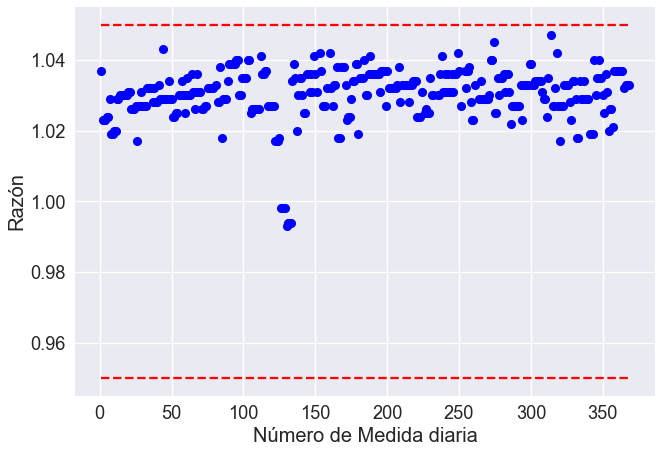

In [163]:
y1= 0.95 + (Medida*0)
y2= 1.05 + (Medida*0)
#plt.grid(False)
plt.ylabel('Razón')
plt.xlabel('Número de Medida diaria')
#plt.title('Razón actividad Co-57 CRC 55tR MN')
plt.plot(Medida1,razon,'bo')
plt.plot(Medida1,y1,'r--')
plt.plot(Medida1,y2,'r--')
#plt.savefig('mncrc55tRraz.pdf')

# CONTROL 

## Shewhart Chart

A Shewhart Chart uses the mean value of the data, and the standard deviation to plot certain limits:
-The upper and lower inf limits are $x\pm \sigma$
-The upper and lower warning limits are $x\pm 2\sigma$
-The upper and lower action limits are $x\pm 3\sigma$

Text(0.5,0,'Número de Medida')

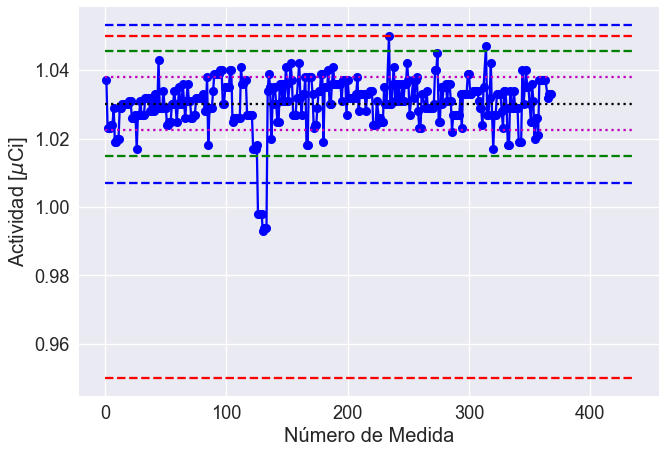

In [141]:
x= data['Number']
y=data['razon']
plt.plot(x,y,'-ob')

meanAct=data['razon'].mean()
Stdeviacion=data['razon'].std()

###Mean
plt.plot((0,435),(meanAct,meanAct),'k:')
plt.plot((0,435),(meanAct+Stdeviacion,meanAct+Stdeviacion),'m:')
plt.plot((0,435),(meanAct-Stdeviacion,meanAct-Stdeviacion),'m:')
plt.plot((0,435),(meanAct+(2*Stdeviacion),meanAct+(2*Stdeviacion)),'g--')
plt.plot((0,435),(meanAct-(2*Stdeviacion),meanAct-(2*Stdeviacion)),'g--')
plt.plot((0,435),(meanAct+(3*Stdeviacion),meanAct+(3*Stdeviacion)),'b--')
plt.plot((0,435),(meanAct-(3*Stdeviacion),meanAct-(3*Stdeviacion)),'b--')
#plt.plot(xt,y,'or')

### Rango Tolerancia
plt.plot((0,435),(0.95,0.95),'r--')
plt.plot((0,435),(1.05,1.05),'r--')

#xt= np.arange(1,436,1)
#Mean
#y1= meanAct + (xt*0)
## 1 sigma
#y2= meanAct+Stdeviacion+ (xt*0)
#y3= meanAct-Stdeviacion+ (xt*0)
## 2 sigma
#y4= meanAct- (2*Stdeviacion)+ (xt*0)
#y5= meanAct+ (2*Stdeviacion)+ (xt*0)
## 3 sigma
#y6= meanAct- (3*Stdeviacion)+ (xt*0)
#y7= meanAct+ (3*Stdeviacion)+ (xt*0)

##The lines to plot
#plt.plot(xt,y,'or')
#plt.plot(xt,y1,'k:')
#plt.plot(xt,y2,'m:')
#plt.plot(xt,y3,'m:')
#plt.plot(xt,y4,'g--')
#plt.plot(xt,y5,'g--')
#plt.plot(xt,y6,'b--')
#plt.plot(xt,y7,'b--')


#Text in plot

#plt.text(310,206.5,'Mean',color='black',size=12)
#plt.text(310,209.5,'Mean+$\sigma$',color='magenta',size=12)
#plt.text(310,212.3,'Mean+ 2$\sigma$',color='green',size=12)
#plt.text(310,215,'Mean+ 3$\sigma$',color='blue',size=12)
#plt.fill_between(xt, y2,y3, color='dodgerblue', alpha='0.8')
#plt.fill_between(xt, y4,y5, color='dodgerblue', alpha='0.5')
#plt.fill_between(xt, y6,y7, color='lightskyblue', alpha='0.5')

plt.ylabel('Actividad [$\mu$Ci]')
plt.xlabel('Número de Medida')

#plt.plot((0, 300),(206.8,206.8), 'k:', linewidth=2) 
## 1 sigma
#plt.plot((0, 300),(209.2,209.2), 'm:', linewidth=2)
#plt.plot((0, 300),(204.4,204.4), ':m', linewidth=2)
## 2 sigma
#plt.plot((0, 300),(202,202), 'g--', linewidth=2)
#plt.plot((0, 300),(211.6,211.6), 'g--', linewidth=2)
## 3 sigma
#plt.plot((0, 300),(199.6,199.6), 'b--', linewidth=2)
#plt.plot((0, 300),(214,214), 'b--', linewidth=2)
#plt.savefig('PETActividad.pdf')

### For a system in control

In [142]:
def count(datos,L,H):
    c=0
    for x in datos:
    #Condition check
        if x<L or x>H:
            c+=1
    return c 

In [143]:
### Information Limits
HIL= meanAct+Stdeviacion
LIL= meanAct-Stdeviacion
### Warning Limits
HWL= meanAct+(2*Stdeviacion)
LWL= meanAct-(2*Stdeviacion)
### Action Limits
HAL= meanAct+(3*Stdeviacion)
LAL= meanAct-(3*Stdeviacion)

In [144]:
### 1 in 3 outside, Information limits
data['Actividad'].count()/3

119.0

In [145]:
count(data['Actividad'],LIL,HIL)

357

In [146]:
### 1 in 20 outside, Warning limits
data['Actividad'].count()/20

17.850000000000001

In [147]:
count(data['Actividad'],LWL,HWL)

357

In [148]:
### 1 in 1000 outside, Action limits
data['Actividad'].count()/1000

0.35699999999999998

In [149]:
count(data['Actividad'],LAL,HAL)

357

In [150]:

x= data['Number']
y=data['Actividad']
#plt.plot(x,y,'oy')

yteo=data['ActividadmuC']
Stdeviacion=data['residuos'].std()

xt= np.arange(0,439,1)
#Mean
y1= yteo+ (xt*0)
## 1 sigma
y2= yteo+Stdeviacion+ (xt*0)
y3= yteo-Stdeviacion+ (xt*0)
## 2 sigma
y4= yteo- (2*Stdeviacion)+ (xt*0)
y5= yteo+ (2*Stdeviacion)+ (xt*0)
## 3 sigma
y6= yteo- (3*Stdeviacion)+ (xt*0)
y7= yteo+ (3*Stdeviacion)+ (xt*0)

##The lines to plot
plt.plot(xt,y,'or')
plt.plot(xt,y1,'k:')
plt.plot(xt,y2,'m:')
plt.plot(xt,y3,'m:')
plt.plot(xt,y4,'g--')
plt.plot(xt,y5,'g--')
plt.plot(xt,y6,'b--')
plt.plot(xt,y7,'b--')


#Text in plot

#plt.text(310,206.5,'Mean',color='black',size=12)
#plt.text(310,209.5,'Mean+$\sigma$',color='magenta',size=12)
#plt.text(310,212.3,'Mean+ 2$\sigma$',color='green',size=12)
#plt.text(310,215,'Mean+ 3$\sigma$',color='blue',size=12)
#plt.fill_between(xt, y2,y3, color='dodgerblue', alpha='0.8')
#plt.fill_between(xt, y4,y5, color='dodgerblue', alpha='0.5')
#plt.fill_between(xt, y6,y7, color='lightskyblue', alpha='0.5')

plt.ylabel('Actividad [$\mu$Ci]')
plt.xlabel('Measurement number')
#plt.savefig('SPECTActividad.pdf'

KeyError: 'ActividadmuC'

## Cusum Chart

In [ ]:
## Differences from mean
Diferencias=data['Actividad']-data['ActividadmuC']
data['Diferencias']= Diferencias

In [ ]:
data['Diferencias'].describe()

In [ ]:
data['Diferencias']

In [ ]:
##A cumulative sum function
suma=np.cumsum(data['Diferencias'])
data['Suma']= suma

In [ ]:
xc= data['Number']
yc=data['Suma']
plt.plot(xc,yc,'oy')